In [1]:
import pandas as pd

In [44]:
def read_csv(filename):
  csv = pd.read_csv(filename)
 
  return pd.DataFrame({
    'DIFFX': csv['CH1'][1:].astype('float') * csv['Increment'][0].astype('float') + csv['Start'][0].astype('float'),
    'DIFFY': csv['CH2'][1:].astype('float') * csv['Increment'][0].astype('float') + csv['Start'][0].astype('float'),
    'SUM': csv['CH3'][1:].astype('float') * csv['Increment'][0].astype('float') + csv['Start'][0].astype('float')
  })

In [45]:
import os

data = {file.split('.csv')[0]: read_csv(file) for file in os.listdir() if file.endswith('.csv')}

In [46]:
data

{'center-left':          DIFFX     DIFFY       SUM
 1    -2.998408 -2.999846 -2.997240
 2    -2.998390 -2.999830 -2.997210
 3    -2.998392 -2.999846 -2.997240
 4    -2.998408 -2.999830 -2.997208
 5    -2.998390 -2.999846 -2.997242
 ...        ...       ...       ...
 1196 -2.998410 -2.999854 -2.997212
 1197 -2.998410 -2.999852 -2.997212
 1198 -2.998392 -2.999836 -2.997246
 1199 -2.998390 -2.999854 -2.997212
 1200 -2.998410 -2.999838 -2.997244
 
 [1200 rows x 3 columns],
 'upper-left':          DIFFX     DIFFY       SUM
 1    -2.997998 -2.998338 -2.997366
 2    -2.998014 -2.998322 -2.997398
 3    -2.998000 -2.998322 -2.997362
 4    -2.998016 -2.998338 -2.997396
 5    -2.998018 -2.998338 -2.997362
 ...        ...       ...       ...
 1196 -2.998018 -2.998328 -2.997366
 1197 -2.998020 -2.998328 -2.997366
 1198 -2.998002 -2.998342 -2.997400
 1199 -2.998002 -2.998328 -2.997400
 1200 -2.998018 -2.998344 -2.997368
 
 [1200 rows x 3 columns],
 'lower-left':          DIFFX     DIFFY       SUM
 

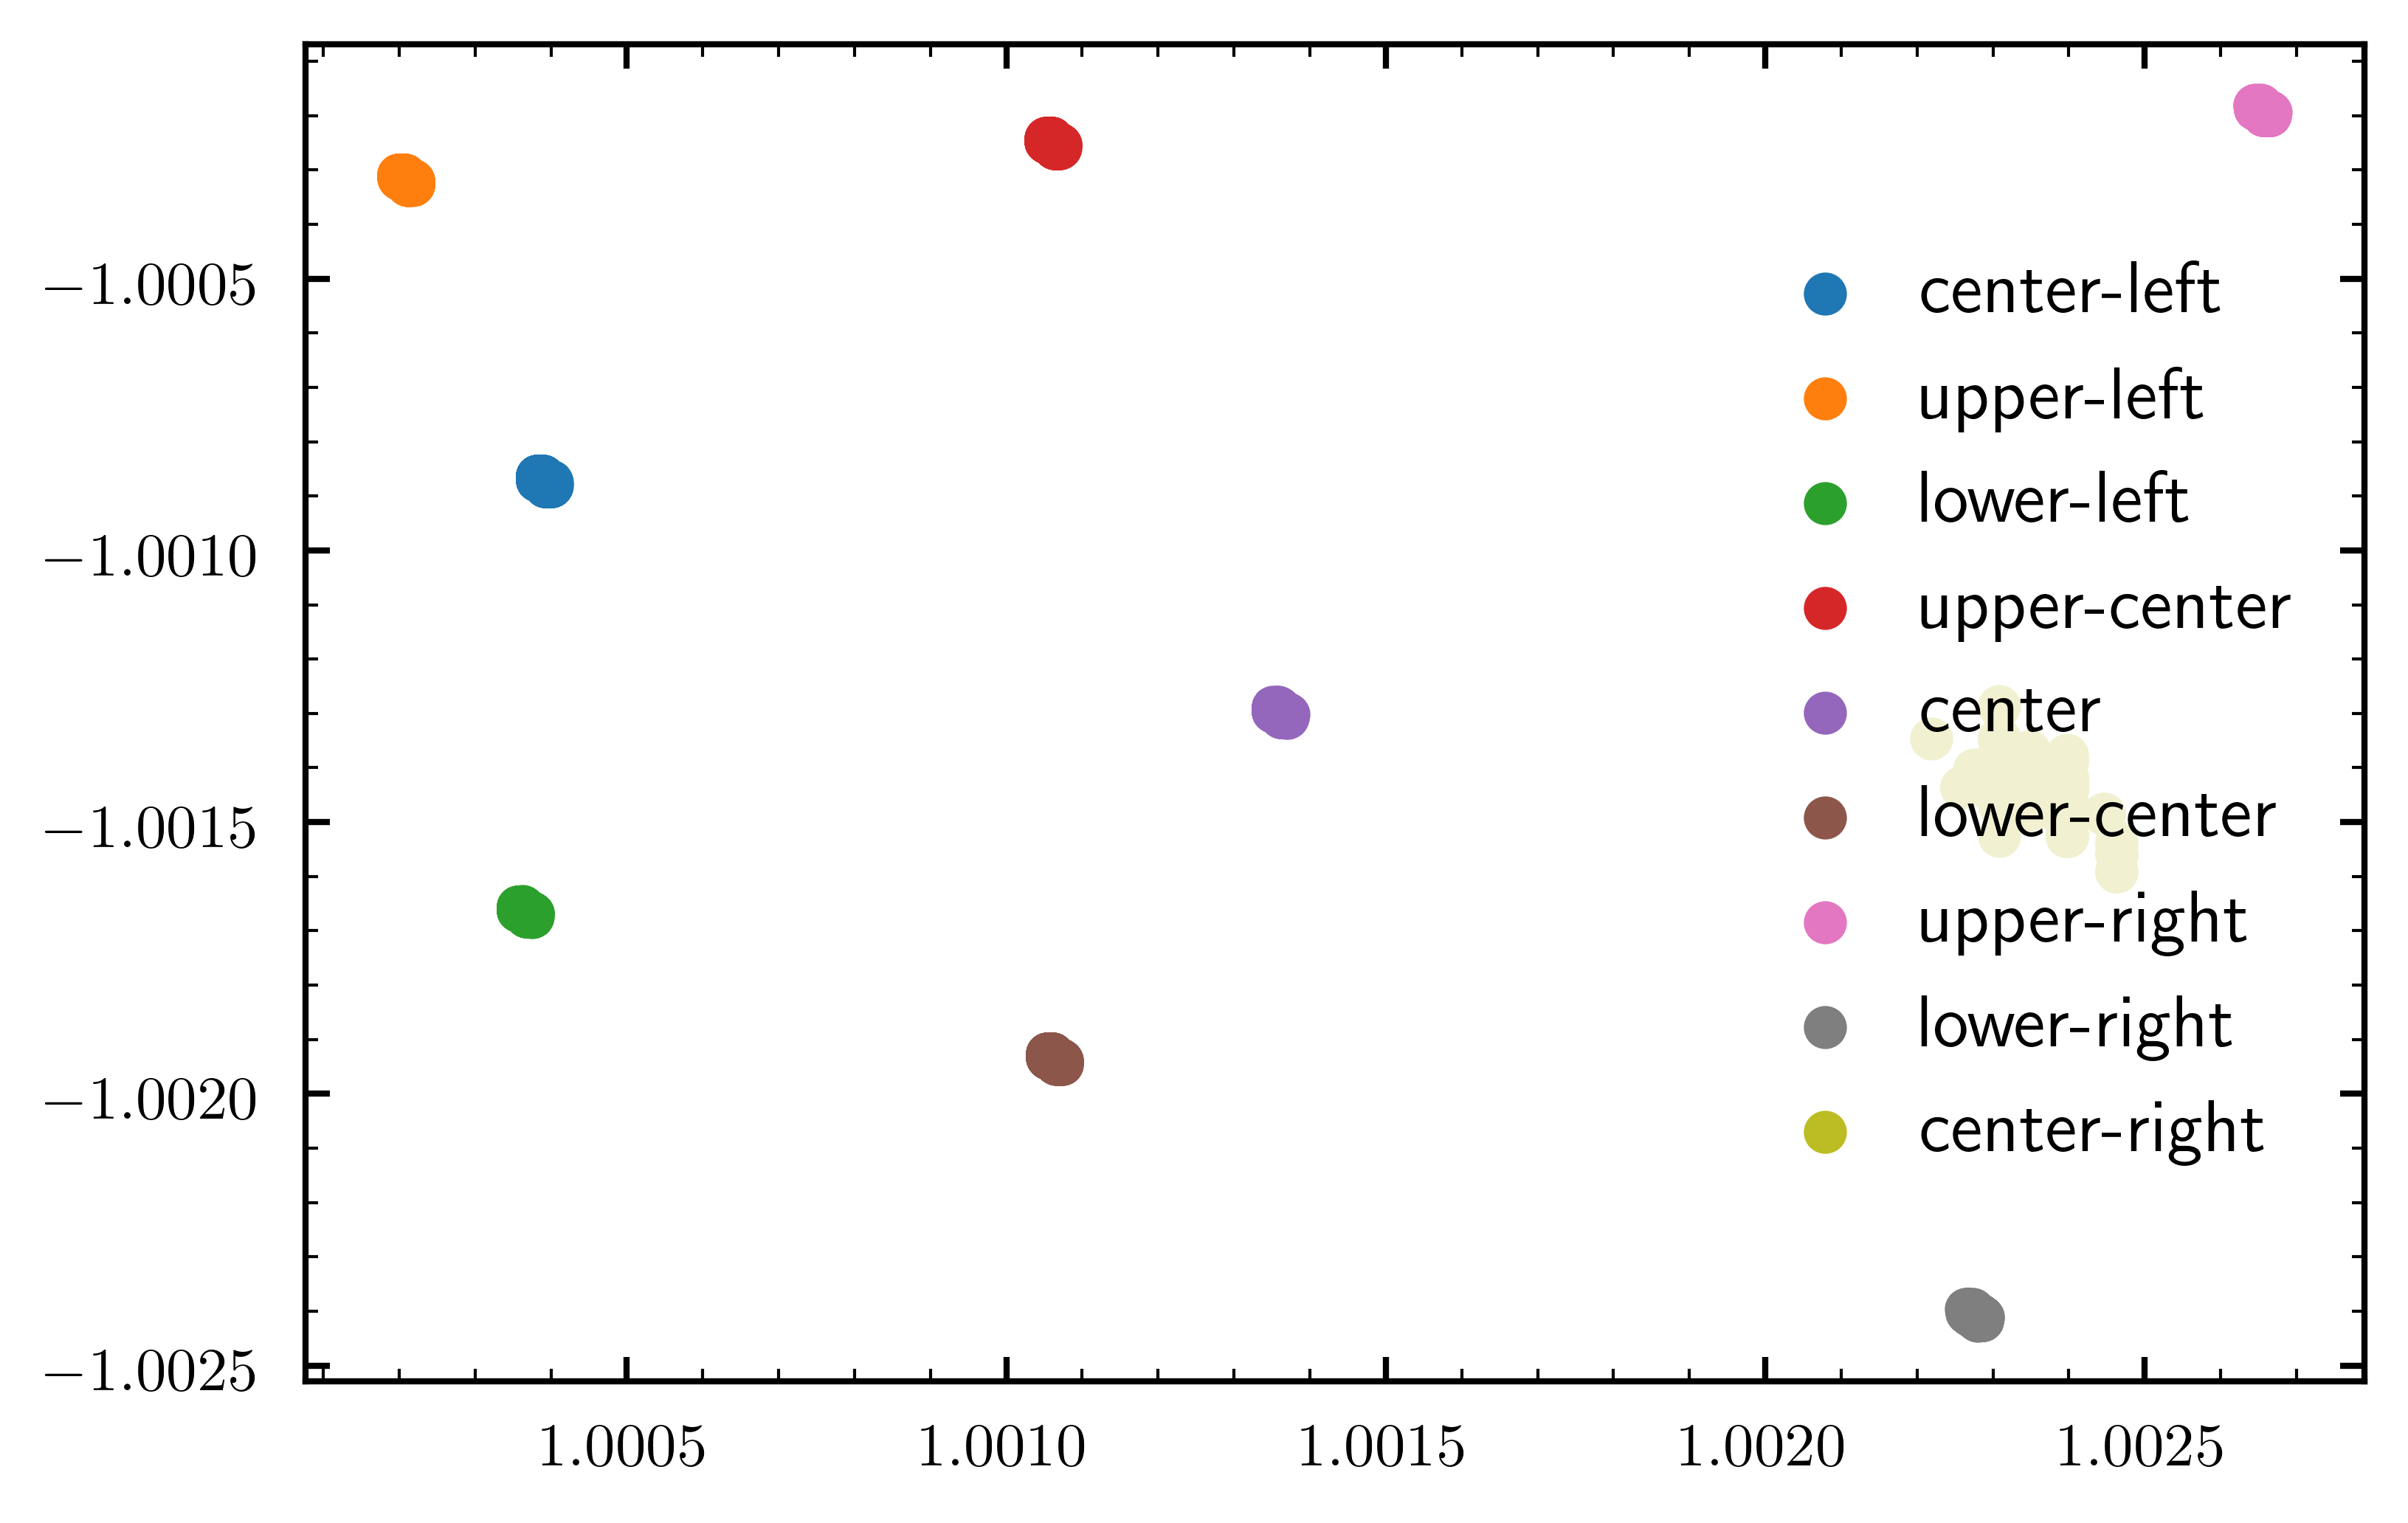

In [52]:
from matplotlib import pyplot as plt

plt.figure(dpi=300, figsize=(6, 4))

for (pos, df) in data.items():
  x = df['DIFFX'] / df['SUM']
  y = df['DIFFY'] / df['SUM']

  plt.scatter(x, -y, label=pos)
 
plt.legend()
plt.show()

In [57]:
x_mean = []
y_mean = []
sum_mean = []

x_std = []
y_std = []
sum_std = []

for (pos, df) in data.items():
  x = df['DIFFX']
  y = df['DIFFY']
  xy = df['SUM']
  
  x_mean.append(x.mean())
  y_mean.append(y.mean())
  sum_mean.append(xy.mean())
  
  x_std.append(x.std())
  y_std.append(y.std())
  sum_std.append(xy.std())
  
statistics = pd.DataFrame({
  'position': list(data.keys()),
  'x mean': x_mean,
  'x std': x_std,
  'y mean': y_mean,
  'y std': y_std,
  'sum mean': sum_mean,
  'sum std': sum_std,
})

In [58]:
statistics

,position,x mean,x std,y mean,y std,sum mean,sum std
0,center-left,-2.998400,0.000009,-2.999843,0.000008,-2.997228,0.000017
1,upper-left,-2.998008,0.000009,-2.998335,0.000008,-2.997382,0.000017
2,lower-left,-2.998436,0.000008,-3.002328,0.000008,-2.997338,0.000017
3,upper-center,-2.999754,0.000008,-2.997323,0.000008,-2.996572,0.000016
4,center,-3.000572,0.000008,-3.000385,0.000008,-2.996496,0.000017
5,lower-center,-3.000074,0.000009,-3.002689,0.000008,-2.996888,0.000016
6,upper-right,-3.003815,0.000009,-2.996430,0.000008,-2.995860,0.000016
7,lower-right,-3.002982,0.000008,-3.003372,0.000008,-2.996162,0.000017
8,center-right,-3.003274,0.000114,-3.000642,0.000076,-2.996327,0.000070


In [72]:
# voltage range
Vx = statistics['x mean'].max() - statistics['x mean'].min()
Vy = statistics['y mean'].max() - statistics['y mean'].min()

# voltage noise (upper limit)
Nx = statistics['x std'].mean()
Ny = statistics['y std'].mean()

In [73]:
L = 4e-3 # 4 mm

# resolution (in um)
Nx * L / Vx * 1e6, Ny * L / Vy  * 1e6

(14.005637678093052, 9.01525099057445)